# Happy Costumer

Import necessary library

In [1]:
import random
import numpy as np
import pandas as pd
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [ ]:
seed=1234
random.seed(seed)
np.random.seed(seed)

## Read Data

In [2]:
df = pd.read_csv('ACME-HappinessSurvey2020.csv')

array([[<Axes: title={'center': 'Y'}>, <Axes: title={'center': 'X1'}>,
        <Axes: title={'center': 'X2'}>],
       [<Axes: title={'center': 'X3'}>, <Axes: title={'center': 'X4'}>,
        <Axes: title={'center': 'X5'}>],
       [<Axes: title={'center': 'X6'}>, <Axes: >, <Axes: >]], dtype=object)

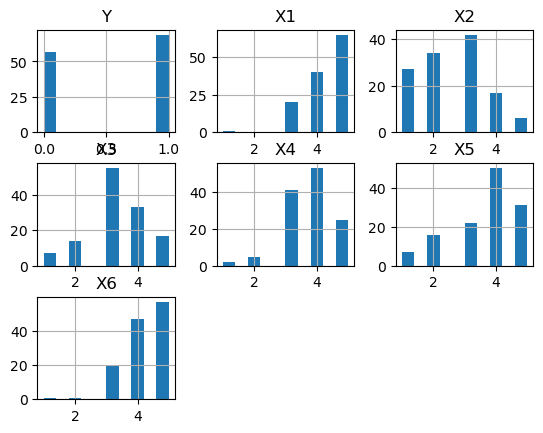

In [3]:
df[['X1', 'X2', 'X3', 'X4', 'X5']].hist(figsize=(10, 5), layout=(2, 3))

In [4]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
df.corr()

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


In [6]:
df.corr().style.background_gradient(cmap='coolwarm')

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


In [7]:
input_column = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
X = df[input_column]
y = df['Y']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
X_train.describe(), X_test.describe()

(               X1          X2          X3          X4          X5          X6
 count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000
 mean     4.420000    2.530000    3.300000    3.710000    3.710000    4.240000
 std      0.727247    1.095952    1.058873    0.879566    1.139688    0.830237
 min      3.000000    1.000000    1.000000    1.000000    1.000000    1.000000
 25%      4.000000    2.000000    3.000000    3.000000    3.000000    4.000000
 50%      5.000000    3.000000    3.000000    4.000000    4.000000    4.000000
 75%      5.000000    3.000000    4.000000    4.000000    5.000000    5.000000
 max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000,
               X1         X2         X3         X4         X5         X6
 count  26.000000  26.000000  26.000000  26.000000  26.000000  26.000000
 mean    4.000000   2.538462   3.346154   3.884615   3.423077   4.307692
 std     0.979796   1.207668   0.891843   0.863802   1.172112   0.735

In [10]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6153846153846154


In [11]:
param_dist = {'n_estimators': np.arange(100, 501, 50), 'max_depth': np.arange(20, 101, 10)}
# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = GridSearchCV(rf, param_grid = param_dist, cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100]),
                         'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500])})

In [12]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 100, 'n_estimators': 100}


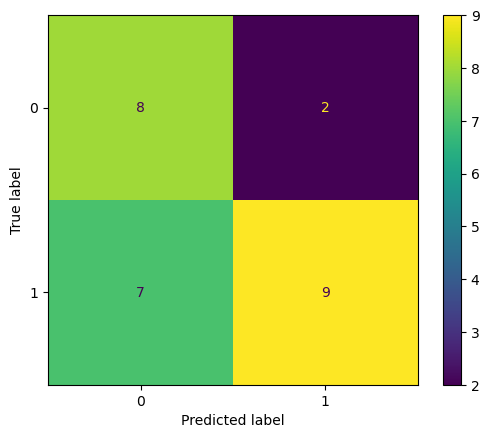

In [13]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [14]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6538461538461539
Precision: 0.8181818181818182
Recall: 0.5625


## Support Vector Classification

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [16]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6538461538461539


In [17]:
param_dist = {'kernel':('linear', 'rbf'), 'C':[x+1 for x in range(100)]}
# Create a random forest classifier
svc = SVC()

# Use random search to find the best hyperparameters
rand_search = GridSearchCV(svc, param_grid = param_dist, cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29, 30, ...],
                         'kernel': ('linear', 'rbf')})

In [18]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'C': 18, 'kernel': 'linear'}


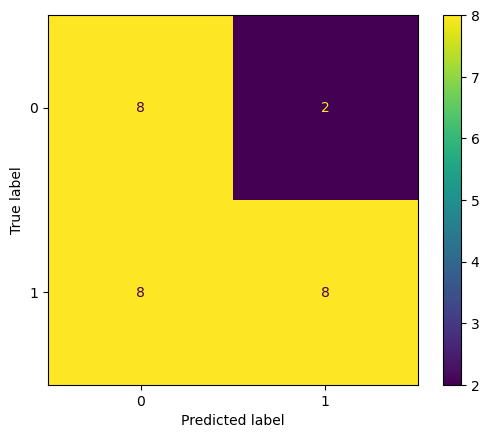

In [19]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [20]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6153846153846154
Precision: 0.8
Recall: 0.5


## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [35]:
input_column = ['X1', 'X2', 'X3', 'X4', 'X5']
X = df[input_column]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
lr = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


In [32]:
lr = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000, l1_ratio=0.5)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4230769230769231


In [33]:
lr = LogisticRegressionCV(cv=5)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.46153846153846156
